<a href="https://colab.research.google.com/github/ChristianBridge/Christian_INFO5731_SPRING2025/blob/main/Bridge_Christian_Assignment_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from **scratch instead of using any pre-existing libraries** to do so:

(1) Count the frequency of all the N-grams (N=3) and (N=2).

(2) Calculate the probabilities for all the bigrams in the dataset by using the formula  count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative
probabilities of each review in terms of other reviews (abstracts, or tweets) by using the formula  frequency (noun phrase) / max frequency (noun phrase) on the whole dataset.

Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [3]:
#Libraries
import pandas as pd
import numpy as np
import re
import math

**Question 1 - 1**

In [4]:
#Import Densho Narrators
df = pd.read_csv("densho_narrators_929.csv")
#Rename Columns
col_names = {'0': 'text', '1': 'new_text'}
df.rename(columns = col_names, inplace = True)

In [5]:
#Text stored as string in CSV, convert back to list
def back_to_list(text):
    return re.sub(r"['\[\]]", "", text)

df['new_text'] = df['new_text'].apply(back_to_list)

In [6]:
#Convert list back to tokens
def back_to_tokens(text):
    return text.split(", ")

df['new_text'] = df['new_text'].apply(back_to_tokens)

In [7]:
#Find all the unique words in the dataset
unique_words = set(word for sublist in df['new_text'] for word in sublist)

In [73]:
#For total number of unique words
num_words = len(unique_words)
word_index = range(0, len(unique_words) + 1)

#Create two dictionaries, one with value as key, one with word as key
word_dict = dict(zip(unique_words, word_index))
word_dict_rev = dict(zip(word_index, unique_words))

In [74]:
#Create dataframe column of text as numbers using dictionary
df['num_text'] = df['new_text'].apply(lambda lst: [word_dict.get(item, item) for item in lst])

In [75]:
#Preview numerical representation of text
df['num_text'].head(10)

,num_text
0,"[176, 353, 2928, 3321, 3694, 931, 431, 1216, 3..."
1,"[176, 353, 2928, 1179, 3239, 1702, 431, 1216, ..."
2,"[176, 353, 224, 1469, 1398, 3139, 153, 3593, 1..."
3,"[176, 353, 2928, 3321, 1776, 2725, 2428, 2655,..."
4,"[176, 3377, 2928, 551, 3115, 2918, 2763, 2517,..."
5,"[176, 3377, 2928, 1179, 1466, 49, 1174, 644, 2..."
6,"[3209, 353, 2928, 2337, 2570, 3477, 2442, 3499..."
7,"[176, 353, 2928, 1179, 227, 3084, 431, 1216, 3..."
8,"[176, 353, 2928, 1179, 914, 931, 431, 1216, 32..."
9,"[176, 3377, 2928, 3321, 866, 2576, 431, 1216, ..."


In [11]:
#Create n-gram function
#n = number of grams
def generate_ngrams(text, n):
    ngrams = [tuple(text[i:i+n]) for i in range(len(text)-n+1)]
    return ngrams

In [12]:
#Create new dataframe column for unigrams
df['unigrams'] = df['new_text'].apply(lambda x: generate_ngrams(x,1))

In [13]:
#Preview Unigram Results
df['unigrams'].head(10)

,unigrams
0,"[(nisei,), (male,), (born,), (septemb,), (23,)..."
1,"[(nisei,), (male,), (born,), (januari,), (25,)..."
2,"[(nisei,), (male,), (world,), (war,), (ii,), (..."
3,"[(nisei,), (male,), (born,), (septemb,), (19,)..."
4,"[(nisei,), (femal,), (born,), (juli,), (15,), ..."
5,"[(nisei,), (femal,), (born,), (januari,), (6,)..."
6,"[(kibei,), (male,), (born,), (august,), (1,), ..."
7,"[(nisei,), (male,), (born,), (januari,), (14,)..."
8,"[(nisei,), (male,), (born,), (januari,), (30,)..."
9,"[(nisei,), (femal,), (born,), (septemb,), (9,)..."


In [14]:
#Create dataframe column for bigrams
df['bigrams'] = df['new_text'].apply(lambda x: generate_ngrams(x, 2))

In [15]:
#Preview results for bigrams
df['bigrams'].head(10)

,bigrams
0,"[(nisei, male), (male, born), (born, septemb),..."
1,"[(nisei, male), (male, born), (born, januari),..."
2,"[(nisei, male), (male, world), (world, war), (..."
3,"[(nisei, male), (male, born), (born, septemb),..."
4,"[(nisei, femal), (femal, born), (born, juli), ..."
5,"[(nisei, femal), (femal, born), (born, januari..."
6,"[(kibei, male), (male, born), (born, august), ..."
7,"[(nisei, male), (male, born), (born, januari),..."
8,"[(nisei, male), (male, born), (born, januari),..."
9,"[(nisei, femal), (femal, born), (born, septemb..."


In [16]:
#Create new dataframe column for trigrams
df['trigrams'] = df['new_text'].apply(lambda x: generate_ngrams(x,3))

In [17]:
#Preview trigram column
df['trigrams'].head(10)

,trigrams
0,"[(nisei, male, born), (male, born, septemb), (..."
1,"[(nisei, male, born), (male, born, januari), (..."
2,"[(nisei, male, world), (male, world, war), (wo..."
3,"[(nisei, male, born), (male, born, septemb), (..."
4,"[(nisei, femal, born), (femal, born, juli), (b..."
5,"[(nisei, femal, born), (femal, born, januari),..."
6,"[(kibei, male, born), (male, born, august), (b..."
7,"[(nisei, male, born), (male, born, januari), (..."
8,"[(nisei, male, born), (male, born, januari), (..."
9,"[(nisei, femal, born), (femal, born, septemb),..."


In [18]:
#Create a function to count the frequency of grams
def gram_counter(text):
    #Create dictionary for storage
    count = {}

    #Iterate over each bigram record
    for record in text:
        #Find each bigram within the record
        for gram in record:
            #If bigram exists add 1 to count
            if gram in count:
                count[gram] += 1
            #If bigram does not exist, create with 1 occurence
            else:
                count[gram] = 1

    #Create bigram dataframe
    gram_df = pd.DataFrame(count.items(), columns=['gram', 'Frequency']).sort_values(by='Frequency', ascending=False)

    return gram_df

In [19]:
#Return frequency dataframe of unigrams
unigram_df = gram_counter(df['unigrams'])
print(unigram_df)

               gram  Frequency
18          (camp,)       1320
92    (california,)       1289
57           (war,)        944
2           (born,)        908
17      (concentr,)        770
...             ...        ...
1511          (74,)          1
2518       (scrap,)          1
1513      (marian,)          1
238       (amidst,)          1
3742     (booksel,)          1

[3743 rows x 2 columns]


In [20]:
#Return frequency dataframe of bigrams
bigram_df = gram_counter(df['bigrams'])
print(bigram_df)

                     gram  Frequency
19       (concentr, camp)        768
68              (war, ii)        617
67           (world, war)        614
1            (male, born)        471
15      (assembl, center)        399
...                   ...        ...
7957   (nichibei, bussan)          1
7958     (bussan, depart)          1
7960         (store, san)          1
7961           (25, 1912)          1
18878     (publish, 1970)          1

[18879 rows x 2 columns]


In [21]:
#Return frequency dataframe of trigrams
trigram_df = gram_counter(df['trigrams'])
print(trigram_df)

                               gram  Frequency
72                 (world, war, ii)        614
0               (nisei, male, born)        372
110            (nisei, femal, born)        283
554                (war, ii, remov)        276
176    (concentr, camp, california)        258
...                             ...        ...
9637       (colorado, 1945, return)          1
9636       (denver, colorado, 1945)          1
9634         (camp, famili, denver)          1
9629       (town, california, bomb)          1
27055      (booksel, publish, 1970)          1

[27056 rows x 2 columns]


**Question 1 - 2**

In [22]:
#Function to calculate bigram probabilities
def calculate_bigram_probabilities(bigram_df, unigram_df):
    #Create empty list for results
    probabilities = []

    #Iterate over each row in bigram DataFrame
    for _, bigram_row in bigram_df.iterrows():
        #Get the bigram tuple (word1, word2)
        bigram = bigram_row['gram']
        #Get the frequency of the bigram
        bigram_frequency = bigram_row['Frequency']
        #Store first word in the bigram
        word1 = bigram[0]

        #Find the unigram frequency for word1
        word1_frequency = unigram_df[unigram_df['gram'] == tuple([word1])]['Frequency'].values

        if len(word1_frequency) > 0:
            #Get frequency from the result
            word1_frequency = word1_frequency[0]
            #Calculate probability
            probability = bigram_frequency / word1_frequency
        #If word1 doesn't exist in the unigram DataFrame, probability is 0
        else:
            probability = 0

        # Save the results as a dictionary
        probabilities.append({
            'word_1': word1,
            'word_2': bigram[1],
            'frequency_of_bigram': bigram_frequency,
            'frequency_of_first_bigram_word': word1_frequency,
            'probability_of_co-occurence': probability
        })

    #Convert list to dataframe
    prob_df = pd.DataFrame(probabilities)
    return prob_df

#Use function
probability_df = calculate_bigram_probabilities(bigram_df, unigram_df)

#show results
print(probability_df)

         word_1  word_2  frequency_of_bigram  frequency_of_first_bigram_word  \
0      concentr    camp                  768                             770   
1           war      ii                  617                             944   
2         world     war                  614                             620   
3          male    born                  471                             503   
4       assembl  center                  399                             399   
...         ...     ...                  ...                             ...   
18874  nichibei  bussan                    1                               1   
18875    bussan  depart                    1                               1   
18876     store     san                    1                              49   
18877        25    1912                    1                              45   
18878   publish    1970                    1                              21   

       probability_of_co-occurence  
0 

**Question 1 - 3**

In [23]:
#Need to use spacy and counter to find noun phrases and count them
import spacy
from collections import Counter
nlp = spacy.load("en_core_web_sm")

In [24]:
#Create function to find noun phrases in lists
def extract_noun_phrases(text_list):
    text = " ".join(text_list)
    doc = nlp(text)
    return [chunk.text for chunk in doc.noun_chunks]

#Create new dataframe column of noun phrases
df['noun_phrases'] = df['new_text'].apply(extract_noun_phrases)

#Create a list of all noun phrases for count
all_noun_phrases = [phrase for phrases in df['noun_phrases'] for phrase in phrases]

#Get frequency of noun phrases from list
phrase_counts = Counter(all_noun_phrases)

#find the maximum frequency of each noun phrase
max_frequency = max(phrase_counts.values())

#Find probability using formula = max frequency / frequency
#And create a dataframe
relative_probabilities = {phrase: freq / max_frequency for phrase, freq in phrase_counts.items()}
relative_prob_df = pd.DataFrame([relative_probabilities])

#Convert the noun phrases into a one-hot encoding dataframe
noun_phrase_df = pd.DataFrame([{phrase: phrases.count(phrase) for phrase in phrase_counts} for phrases in df['noun_phrases']])
# Add original text as a reference
noun_phrase_df = pd.concat([df['new_text'], noun_phrase_df], axis=1)

In [25]:
relative_prob_df

,septemb,23 1925 seattl washington,prewar childhood seattl nihonmachi incarcer puyallup assembl center washington minidoka concentr,idaho refus particip draft imprison mcneil island penitentiari washington draft resist,seattl,januari 25 1920 seattl washington incarcer puyallup assembl center washington minidoka concentr,alien therefor oblig serv imprison mcneil island penitentiari washington vocal critic,model main charact john okada nono boy,nisei male world war ii serv compani part 442nd regiment combat team,american fight unit,...,utah prior world war ii parent live work alameda california world war ii famili,utah war famili return alameda judi,live work san francisco time eventu,alameda famili,japanes american commun,parent hiroshima japan father work atom bomb casualti commiss return japan,lo angel california father physician move san francisco,san francisco state join asian american polit allianc becam,third world liber front strike,work citi light booksel
0,0.092742,0.004032,0.004032,0.004032,0.028226,0.004032,0.004032,0.004032,0.004032,0.008065,...,0.004032,0.004032,0.004032,0.004032,0.004032,0.004032,0.004032,0.004032,0.004032,0.004032


In [26]:
noun_phrase_df.head(5)

,new_text,septemb,23 1925 seattl washington,prewar childhood seattl nihonmachi incarcer puyallup assembl center washington minidoka concentr,idaho refus particip draft imprison mcneil island penitentiari washington draft resist,seattl,januari 25 1920 seattl washington incarcer puyallup assembl center washington minidoka concentr,alien therefor oblig serv imprison mcneil island penitentiari washington vocal critic,model main charact john okada nono boy,nisei male world war ii serv compani part 442nd regiment combat team,...,utah prior world war ii parent live work alameda california world war ii famili,utah war famili return alameda judi,live work san francisco time eventu,alameda famili,japanes american commun,parent hiroshima japan father work atom bomb casualti commiss return japan,lo angel california father physician move san francisco,san francisco state join asian american polit allianc becam,third world liber front strike,work citi light booksel
0,"[nisei, male, born, septemb, 23, 1925, seattl,...",1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"[nisei, male, born, januari, 25, 1920, seattl,...",0,0,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,"[nisei, male, world, war, ii, serv, compani, p...",0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,"[nisei, male, born, septemb, 19, 1917, hanapep...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"[nisei, femal, born, juli, 15, 1906, bedderavi...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any **pre-existing libraries** to do so.

**Question 2 - 1**

In [27]:
# Question 2-1 Build tf-idf matrix
#Find unigrams of numerical text
df['unigrams'] = df['num_text'].apply(lambda x: generate_ngrams(x,1))
#Count the frequency of grams and create a dataframe
unigram_df = gram_counter(df['unigrams'])
print(unigram_df)
print(df['num_text'])

         gram  Frequency
18    (3002,)       1320
92    (2517,)       1289
57    (1469,)        944
2     (2928,)        908
17    (3191,)        770
...       ...        ...
1511  (2103,)          1
2518   (328,)          1
1513   (560,)          1
238   (1130,)          1
3742   (787,)          1

[3743 rows x 2 columns]
0      [176, 353, 2928, 3321, 3694, 931, 431, 1216, 3...
1      [176, 353, 2928, 1179, 3239, 1702, 431, 1216, ...
2      [176, 353, 224, 1469, 1398, 3139, 153, 3593, 1...
3      [176, 353, 2928, 3321, 1776, 2725, 2428, 2655,...
4      [176, 3377, 2928, 551, 3115, 2918, 2763, 2517,...
                             ...                        
924    [2928, 1549, 2493, 3727, 1714, 24, 2928, 3267,...
925    [1632, 3377, 2928, 1549, 503, 3697, 1059, 2517...
926    [1632, 353, 2928, 1819, 3176, 1297, 1103, 2517...
927    [1632, 3377, 2928, 1549, 2078, 2473, 1155, 319...
928    [1632, 353, 2928, 1819, 3719, 2397, 1787, 1052...
Name: num_text, Length: 929, dtype: object


In [28]:
#Calculate Term-Frequency
#Create empty lists to store values, doc #, gram, count
tf_doc = []
tf_gram = []
tf_count = []
#For each unigram
for _, i in unigram_df.iterrows():
    #Store unigram for comparison
    gram = i[0]
    gram = gram[0]
    #Initiate counts and doc num as 0
    count = 0
    doc_num = 0
    #For each document (record) in Densho Narrators cleaned text
    for doc in df['num_text']:
        #Number of words in document
        items = len(doc)
        #Evaluate each word in the document
        for item in doc:
            #Each time gram appears, add 1 to count
            if gram == item:
                count += 1
        #Frequency of Term / Total Terms in Document
        count = count/items
        #Append values to respsective lists
        tf_doc.append(doc_num)
        tf_gram.append(gram)
        tf_count.append(count)
        #Iterate Document Number
        doc_num += 1
#Create zip object of Doc #, Word, Term Frequency
tf_doc = zip(tf_doc, tf_gram, tf_count)

#Make zip object a list
tf_doc = list(tf_doc)

#Convert list to dataframe
tf_df = pd.DataFrame(tf_doc, columns = ['document', 'word', 'value'])

#Pivot dataframe
tf_df = tf_df.pivot_table(index = 'document', columns = 'word', values = 'value', fill_value = 0)

#Preview output
tf_df.head(10)

<ipython-input-28-2ba41d550a00>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  gram = i[0]


word,0,1,2,3,4,5,6,7,8,9,...,3733,3734,3735,3736,3737,3738,3739,3740,3741,3742
document,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.538462e-02,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,3.752345e-04,0.0,0.0,0.0,0.0,0.0,0.0,2.439024e-02,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,4.810699e-06,0.0,0.0,0.0,0.0,0.0,0.0,3.126954e-04,0.0,...,0.0,0.0,0.0,0.012821,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,1.202675e-07,0.0,0.0,0.0,0.0,0.0,0.0,7.817386e-06,0.0,...,0.0,0.0,0.0,0.025321,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,3.250472e-09,0.0,0.0,0.0,0.0,0.0,0.0,2.112807e-07,0.0,...,0.0,0.0,0.0,0.000684,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
#Sometimes above dataframe is all 0s
#Find a commonly used word and ensure dataframe looks okay
camp_key = word_dict['camp']
tf_df[camp_key]

,3002
document,
0,0.029412
1,0.020185
2,0.028338
3,0.024484
4,0.015761
...,...
924,0.000016
925,0.037037
926,0.013827


In [30]:
#Calculate Inverse Document Frequency
#Create empty lists
idf_gram = []
idf_count = []
#Get number of documents in dataset
num_docs = df['num_text'].size
#For each unigram
for _, i in unigram_df.iterrows():
    #Store the gram
    gram = i[0]
    gram = gram[0]
    #Initiate gram count 0
    count = 0
    #for each document in dataset
    for doc in df['num_text']:
        #if gram occurs iterate count
        if gram in doc:
            count += 1
    #Number of documents / count of unigram
    count = num_docs / count
    #log of count
    count = math.log10(count)
    #Add information to lists
    idf_gram.append(gram)
    idf_count.append(count)

#Create zip object of lists
idf_doc = zip(idf_gram, idf_count)
#Create list from zip object
idf_doc = list(idf_doc)
#Create dataframe from list
idf_df = pd.DataFrame(idf_doc, columns = ['word','value'])
#Preview Dataframe
idf_df.head(10)

<ipython-input-30-e79b46cf6627>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  gram = i[0]


,word,value
0,3002,0.121679
1,2517,0.200118
2,1469,0.135507
3,2928,0.020582
4,3191,0.147814
5,176,0.127282
6,224,0.198638
7,1398,0.199378
8,2778,0.249514
9,918,0.389377


In [31]:
#Use word number as index, instead of default index
idf_df.set_index('word', inplace = True)

In [32]:
#Resort the dataframe by new index
idf_df.sort_index(ascending = True, inplace = True)

In [33]:
#Preview dataframe
idf_df.head(10)

,value
word,
0,2.365956
1,2.666986
2,2.968016
3,2.269046
4,2.365956
5,2.666986
6,2.968016
7,2.968016
8,1.821888


In [34]:
#Create a list of IDF values
idf_aligned = idf_df['value'].values
print(idf_aligned)

[2.36595572 2.66698572 2.96801571 ... 2.96801571 1.60628788 2.49089446]


In [35]:
#Multiply the term frequency document by their idf values
tfidf_matrix = tf_df * idf_aligned
#preview dataframe
tfidf_matrix.head(10)

word,0,1,2,3,4,5,6,7,8,9,...,3733,3734,3735,3736,3737,3738,3739,3740,3741,3742
document,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,4.103055e-02,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,1.000745e-03,0.0,0.0,0.0,0.0,0.0,0.0,4.443628e-02,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,1.283007e-05,0.0,0.0,0.0,0.0,0.0,0.0,5.696960e-04,0.0,...,0.0,0.0,0.0,0.007797,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,3.207516e-07,0.0,0.0,0.0,0.0,0.0,0.0,1.424240e-05,0.0,...,0.0,0.0,0.0,0.015399,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,8.668963e-09,0.0,0.0,0.0,0.0,0.0,0.0,3.849297e-07,0.0,...,0.0,0.0,0.0,0.000416,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
#Use previously stored key value for 'camp' to check dataframe results
tfidf_matrix[camp_key]

,3002
document,
0,0.003579
1,0.002456
2,0.003448
3,0.002979
4,0.001918
...,...
924,0.000002
925,0.004507
926,0.001682


**Question 2 - 2**

In [37]:
#Question 2-2
'''
To rank the documents with respect to query (design a query by yourself, for example,
"An Outstanding movie with a haunting performance and best character development") by using cosine similarity.
'''
query = 'Japanese Male in camp during world war ii during 1942'

In [38]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.metrics.pairwise import cosine_similarity

In [39]:
#Download the relevant resources
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [40]:
# Initialize stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [41]:
# Define preprocessing function
def preprocess_text(text):
    #Convert to lowercase
    text = str(text).lower()
    #Remove special characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    #Tokenization
    tokens = word_tokenize(text)
    #Import set of stopwords from NLTK
    stop_words = set(stopwords.words('english'))
    #Using the stop word set, remove them from the text
    tokens = [word for word in tokens if word not in stop_words]
    #Stem words
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    #Lemmatize
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in stemmed_tokens]
    return lemmatized_tokens

In [42]:
query = preprocess_text(query)
print(query)

['japanes', 'male', 'camp', 'world', 'war', 'ii', '1942']


In [43]:
num_query = [word_dict.get(item) for item in query]

In [44]:
num_query

[3062, 353, 3002, 224, 1469, 1398, 2473]

In [45]:
df = pd.concat([df, pd.DataFrame({'num_text': [num_query]})], ignore_index=True)

In [46]:
df.tail(10)

,text,new_text,num_text,unigrams,bigrams,trigrams,noun_phrases
920,"Nisei male. Born June 15, 1932, in Alameda, Ca...","[nisei, male, born, june, 15, 1932, alameda, c...","[176, 353, 2928, 3656, 3115, 1949, 772, 2517, ...","[(176,), (353,), (2928,), (3656,), (3115,), (1...","[(nisei, male), (male, born), (born, june), (j...","[(nisei, male, born), (male, born, june), (bor...","[nisei male, 1932 alameda california, alameda ..."
921,"Sansei female. Born January 16, 1944, at the T...","[sansei, femal, born, januari, 16, 1944, topaz...","[1632, 3377, 2928, 1179, 2995, 2041, 1155, 319...","[(1632,), (3377,), (2928,), (1179,), (2995,), ...","[(sansei, femal), (femal, born), (born, januar...","[(sansei, femal, born), (femal, born, januari)...",[sansei femal born januari 16 1944 topaz conce...
922,"Nisei male. Born December 26, 1938, in Salem, ...","[nisei, male, born, decemb, 26, 1938, salem, o...","[176, 353, 2928, 1549, 3126, 775, 1560, 3499, ...","[(176,), (353,), (2928,), (1549,), (3126,), (7...","[(nisei, male), (male, born), (born, decemb), ...","[(nisei, male, born), (male, born, decemb), (b...","[nisei male born decemb, 1938 salem oregon fam..."
923,"Sansei male. Born August 10, 1952, in Berkeley...","[sansei, male, born, august, 10, 1952, berkele...","[1632, 353, 2928, 2337, 503, 804, 1023, 2517, ...","[(1632,), (353,), (2928,), (2337,), (503,), (8...","[(sansei, male), (male, born), (born, august),...","[(sansei, male, born), (male, born, august), (...","[sansei male, berkeley california, uc berkeley..."
924,"Born December 8, 1934, in Pittsburgh, Pennsylv...","[born, decemb, 8, 1934, pittsburgh, pennsylvan...","[2928, 1549, 2493, 3727, 1714, 24, 2928, 3267,...","[(2928,), (1549,), (2493,), (3727,), (1714,), ...","[(born, decemb), (decemb, 8), (8, 1934), (1934...","[(born, decemb, 8), (decemb, 8, 1934), (8, 193...","[born decemb, 1934 pittsburgh pennsylvania bor..."
925,"Sansei female. Born December 10, 1937, in Stoc...","[sansei, femal, born, decemb, 10, 1937, stockt...","[1632, 3377, 2928, 1549, 503, 3697, 1059, 2517...","[(1632,), (3377,), (2928,), (1549,), (503,), (...","[(sansei, femal), (femal, born), (born, decemb...","[(sansei, femal, born), (femal, born, decemb),...","[sansei femal born decemb, 10 1937 stockton ca..."
926,"Sansei male. Born April 20, 1939, in Salinas, ...","[sansei, male, born, april, 20, 1939, salina, ...","[1632, 353, 2928, 1819, 3176, 1297, 1103, 2517...","[(1632,), (353,), (2928,), (1819,), (3176,), (...","[(sansei, male), (male, born), (born, april), ...","[(sansei, male, born), (male, born, april), (b...","[sansei male, april 20 1939 salina california,..."
927,"Sansei female. Born December 27, 1942, in the ...","[sansei, femal, born, decemb, 27, 1942, topaz,...","[1632, 3377, 2928, 1549, 2078, 2473, 1155, 319...","[(1632,), (3377,), (2928,), (1549,), (2078,), ...","[(sansei, femal), (femal, born), (born, decemb...","[(sansei, femal, born), (femal, born, decemb),...","[sansei femal born decemb, utah prior world wa..."
928,"Sansei male. Born April 17, 1949, in Cincinnat...","[sansei, male, born, april, 17, 1949, cincinna...","[1632, 353, 2928, 1819, 3719, 2397, 1787, 1052...","[(1632,), (353,), (2928,), (1819,), (3719,), (...","[(sansei, male), (male, born), (born, april), ...","[(sansei, male, born), (male, born, april), (b...","[sansei male, parent hiroshima japan father wo..."
929,NaN,NaN,"[3062, 353, 3002, 224, 1469, 1398, 2473]",NaN,NaN,NaN,NaN


In [47]:
#Calculate Term-Frequency
#Create empty lists to store values, doc #, gram, count
tf_doc = []
tf_gram = []
tf_count = []
#For each unigram
for _, i in unigram_df.iterrows():
    #Store unigram for comparison
    gram = i[0]
    gram = gram[0]
    #Initiate counts and doc num as 0
    count = 0
    doc_num = 0
    #For each document (record) in Densho Narrators cleaned text
    for doc in df['num_text']:
        #Number of words in document
        items = len(doc)
        #Evaluate each word in the document
        for item in doc:
            #Each time gram appears, add 1 to count
            if gram == item:
                count += 1
        #Frequency of Term / Total Terms in Document
        count = count/items
        #Append values to respsective lists
        tf_doc.append(doc_num)
        tf_gram.append(gram)
        tf_count.append(count)
        #Iterate Document Number
        doc_num += 1
#Create zip object of Doc #, Word, Term Frequency
tf_doc = zip(tf_doc, tf_gram, tf_count)

#Make zip object a list
tf_doc = list(tf_doc)

#Convert list to dataframe
tf_df = pd.DataFrame(tf_doc, columns = ['document', 'word', 'value'])

#Pivot dataframe
tf_df = tf_df.pivot_table(index = 'document', columns = 'word', values = 'value', fill_value = 0)

#Preview output
tf_df.head(10)

<ipython-input-47-2ba41d550a00>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  gram = i[0]


word,0,1,2,3,4,5,6,7,8,9,...,3733,3734,3735,3736,3737,3738,3739,3740,3741,3742
document,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.538462e-02,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,3.752345e-04,0.0,0.0,0.0,0.0,0.0,0.0,2.439024e-02,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,4.810699e-06,0.0,0.0,0.0,0.0,0.0,0.0,3.126954e-04,0.0,...,0.0,0.0,0.0,0.012821,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,1.202675e-07,0.0,0.0,0.0,0.0,0.0,0.0,7.817386e-06,0.0,...,0.0,0.0,0.0,0.025321,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,3.250472e-09,0.0,0.0,0.0,0.0,0.0,0.0,2.112807e-07,0.0,...,0.0,0.0,0.0,0.000684,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
#Calculate Inverse Document Frequency
#Create empty lists
idf_gram = []
idf_count = []
#Get number of documents in dataset
num_docs = df['num_text'].size
#For each unigram
for _, i in unigram_df.iterrows():
    #Store the gram
    gram = i[0]
    gram = gram[0]
    #Initiate gram count 0
    count = 0
    #for each document in dataset
    for doc in df['num_text']:
        #if gram occurs iterate count
        if gram in doc:
            count += 1
    #Number of documents / count of unigram
    count = num_docs / count
    #log of count
    count = math.log10(count)
    #Add information to lists
    idf_gram.append(gram)
    idf_count.append(count)

#Create zip object of lists
idf_doc = zip(idf_gram, idf_count)
#Create list from zip object
idf_doc = list(idf_doc)
#Create dataframe from list
idf_df = pd.DataFrame(idf_doc, columns = ['word','value'])
#Preview Dataframe
idf_df.head(10)

<ipython-input-48-e79b46cf6627>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  gram = i[0]


,word,value
0,3002,0.121528
1,2517,0.200585
2,1469,0.135336
3,2928,0.021049
4,3191,0.148281
5,176,0.127750
6,224,0.198368
7,1398,0.199106
8,2778,0.249981
9,918,0.389844


In [49]:
#Use word number as index, instead of default index
idf_df.set_index('word', inplace = True)

#Resort the dataframe by new index
idf_df.sort_index(ascending = True, inplace = True)

#Preview dataframe
idf_df.head(10)

#Create a list of IDF values
idf_aligned = idf_df['value'].values
print(idf_aligned)

#Multiply the term frequency document by their idf values
tfidf_matrix = tf_df * idf_aligned

[2.36642296 2.66745295 2.96848295 ... 2.96848295 1.60675511 2.49136169]


In [50]:
#Preview dataframe
tfidf_matrix.tail(10)

word,0,1,2,3,4,5,6,7,8,9,...,3733,3734,3735,3736,3737,3738,3739,3740,3741,3742
document,,,,,,,,,,,,,,,,,,,,,
920,0.0,0.0,0.0,1.625324e-45,1.225545e-214,1.899872e-45,0.0,0.0,3.696994e-07,0.0,...,0.0,1.583115e-114,6.548446e-126,7.657870e-06,4.365195e-199,0.0,7.499402e-23,2.717283e-54,3.521426e-19,0.0
921,0.0,0.0,0.0,4.167497e-47,3.142424e-216,4.871466e-47,0.0,0.0,9.479472e-09,0.0,...,0.0,4.059270e-116,1.679089e-127,1.560654e-02,1.119281e-200,0.0,1.922924e-24,6.967392e-56,9.029298e-21,0.0
922,0.0,0.0,0.0,7.185339e-49,5.417972e-218,8.399079e-49,0.0,0.0,1.634392e-10,0.0,...,0.0,6.998742e-118,2.894980e-129,1.076300e-02,1.929795e-202,0.0,3.315386e-26,1.201275e-57,1.556776e-22,0.0
923,0.0,0.0,0.0,1.283096e-50,9.674951e-220,1.499836e-50,0.0,0.0,2.918557e-12,0.0,...,0.0,1.249775e-119,5.169608e-131,2.192961e-02,3.446062e-204,0.0,5.920331e-28,2.145133e-59,2.779956e-24,0.0
924,0.0,0.0,0.0,3.289991e-52,2.480757e-221,3.845732e-52,0.0,0.0,7.483479e-14,0.0,...,0.0,3.204552e-121,1.325540e-132,5.622976e-04,8.836056e-206,0.0,1.518034e-29,5.500341e-61,7.128093e-26,0.0
925,0.0,0.0,0.0,6.092575e-54,4.593994e-223,7.121726e-54,0.0,0.0,1.385829e-15,0.0,...,0.0,5.934356e-123,2.454705e-134,1.041292e-05,1.636307e-207,0.0,2.811173e-31,1.018582e-62,1.320017e-27,0.0
926,0.0,0.0,0.0,8.123433e-56,6.125325e-225,9.495635e-56,0.0,0.0,1.847773e-17,0.0,...,0.0,7.912474e-125,3.272939e-136,8.115438e-03,2.181742e-209,0.0,3.748231e-33,1.358109e-64,1.760023e-29,0.0
927,0.0,0.0,0.0,1.562199e-57,1.177947e-226,1.826084e-57,0.0,0.0,3.553409e-19,0.0,...,0.0,1.521630e-126,6.294114e-138,1.560661e-04,4.195658e-211,0.0,7.208137e-35,2.611748e-66,3.384660e-31,0.0
928,0.0,0.0,0.0,2.892961e-59,2.181383e-228,3.381637e-59,0.0,0.0,6.580387e-21,0.0,...,0.0,2.817833e-128,1.165577e-139,2.890113e-06,7.769737e-213,0.0,1.334840e-36,4.836570e-68,6.267888e-33,0.0


In [51]:
last_document_vector = tfidf_matrix.iloc[-1].values.reshape(1,-1)

In [52]:
# Calculate the cosine similarity between the query (last item) and all records
similarities = cosine_similarity(tfidf_matrix.iloc[:-1], last_document_vector)  # The last item is the query

In [53]:
# Rank the documents based on cosine similarity (higher is better)
ranking = np.argsort(similarities.flatten())[::-1]  # Sort in descending order

# Output the ranked document indices
print("Documents ranked by similarity to the last document:", ranking)

Documents ranked by similarity to the last document: [682 683 813 493 812 319 927 241 294 192 716 928  42 610 223 805 887 252
 194  46 642 748 193 386 279 160  38 492 113 141 796 858  91 389 165  14
 102 128 130  39 334 388 625 142 118 439 208 150 119 488 274 121 166  43
 286 156  51 832 295 109 151 161 692  23 917  24  35 518 841 615 494 264
  57  70 431 715 361 758  66 448 596   9 613 579  19 846 339 895 296  64
 231  20 416 486  84 417 541 594  21 757 201 139 140 574  25  48  94 819
 317  45 124 157 844 802 197 785 629 105 904 347  15 148 436 198 554 761
 655  44 117   6  11 686 158 836  98 893 662 115 631  34 429 676 122 684
 215 789 790 441 280 152 839 696 921 557 120 480 838 892 516 477 297 883
 476  79 843 645 746 547 440 760 196 351 483 589 521 421 697 908 374 535
 186 896  83 620 765 397 481 188  92 287  72 897 592 255 370 681 281 438
  78  75 809 800 434 368 490 510 801 637 876 138 425 845 342 489 482 906
 187 678 346  52 714 206 568 383 762 211 693 869  30 242 269 475 525  7

In [54]:
print(df['new_text'][928])

['sansei', 'male', 'born', 'april', '17', '1949', 'cincinnati', 'ohio', 'shortli', 'afterward', 'move', 'parent', 'hiroshima', 'japan', 'father', 'work', 'atom', 'bomb', 'casualti', 'commiss', 'return', 'japan', 'grew', 'lo', 'angel', 'california', 'father', 'physician', 'move', 'san', 'francisco', 'attend', 'san', 'francisco', 'state', 'join', 'asian', 'american', 'polit', 'allianc', 'becam', 'involv', 'third', 'world', 'liber', 'front', 'strike', 'began', 'work', 'citi', 'light', 'booksel', 'publish', '1970']


In [55]:
print(query)

['japanes', 'male', 'camp', 'world', 'war', 'ii', '1942']


In [60]:
#erase query row from the dataframe
df = df.drop(df.index[-1])

## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit or Fine tune bert model).

(2) Visualize the word embedding model you created. (PCA and T-sne)

(3) Calculate the cosine similarity between a few pairs of words to see if the model captures semantic similarity accurately.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

**Question 3 - 1**

In [56]:
!pip install gensim

In [57]:
#Use Libraries for Word2Vector, plotting, and PCA/TSNE analysis
import gensim
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [61]:
df['new_text']

,new_text
0,"[nisei, male, born, septemb, 23, 1925, seattl,..."
1,"[nisei, male, born, januari, 25, 1920, seattl,..."
2,"[nisei, male, world, war, ii, serv, compani, p..."
3,"[nisei, male, born, septemb, 19, 1917, hanapep..."
4,"[nisei, femal, born, juli, 15, 1906, bedderavi..."
...,...
924,"[born, decemb, 8, 1934, pittsburgh, pennsylvan..."
925,"[sansei, femal, born, decemb, 10, 1937, stockt..."
926,"[sansei, male, born, april, 20, 1939, salina, ..."
927,"[sansei, femal, born, decemb, 27, 1942, topaz,..."


In [62]:
#Train a Word2Vec model using the Skip-gram approach
#Vector size must be 300
model = Word2Vec(sentences=df['new_text'], vector_size=300, window=5, min_count=1, sg=1, workers=4)

#Access the vector for a word (e.g., 'word2vec')
word_vector = model.wv['camp']
print("Vector for 'camp':")
print(word_vector)

Vector for 'camp':
[ 0.00293384 -0.0710085  -0.1469394  -0.01117184  0.04700808 -0.19356667
  0.14375162  0.5645051   0.14957173 -0.05889055  0.35339868 -0.23272924
 -0.24541168 -0.04766491 -0.20769054 -0.4075762   0.2067589  -0.21021123
  0.01159543  0.12149483  0.13428058  0.10038771  0.29881093  0.13547833
  0.02779427 -0.00306382 -0.22120279  0.15395752 -0.09047668 -0.15744302
  0.15500131 -0.09403066  0.17438202  0.06586697  0.12456529  0.0717196
  0.17820628 -0.33820665 -0.22437315 -0.05833464 -0.19172513 -0.06482109
 -0.0610254  -0.30455688 -0.169851    0.13161275  0.2502352   0.08013173
 -0.11732595  0.25445428  0.10289288 -0.01248111 -0.10149536 -0.20013519
  0.02154577  0.1943382   0.29365492  0.20096178 -0.02855644  0.18976411
 -0.04763927 -0.03962864  0.02750911 -0.07937716  0.019345    0.22393961
  0.08043592 -0.03730365 -0.20565605 -0.14851809  0.10182259  0.32686904
  0.29597658 -0.32605782  0.08048365  0.2704234  -0.0849112   0.03278787
 -0.10661443  0.20997566 -0.27209

**Question 3 - 2**

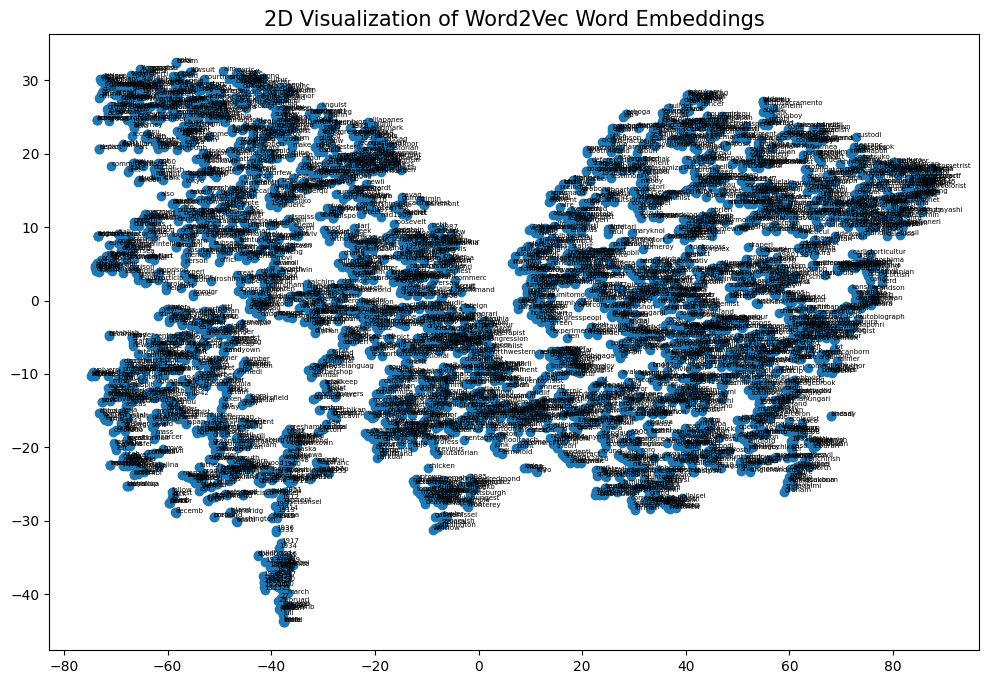

In [63]:
#Create list of words in model using .index_to_key
word_list = list(model.wv.index_to_key)

#Get each word's vector and store as an array
word_vectors = np.array([model.wv[word] for word in word_list])

#Instantiate the PCA model
pca = PCA(n_components=50)
#Fit and Apply the model to word_vectors
pca_result = pca.fit_transform(word_vectors)

#Instantiate the TSNE model
tsne = TSNE(n_components=2)
#Fit and Apply the model to pca_results
tsne_result = tsne.fit_transform(pca_result)

#Create plot of the tsne_results
plt.figure(figsize=(12, 8))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1])

# Annotate each point with the corresponding word
for i, word in enumerate(word_list):
    plt.annotate(word, (tsne_result[i, 0], tsne_result[i, 1]), fontsize=5)

plt.title("2D Visualization of Word2Vec Word Embeddings", fontsize=15)
plt.show()

**Question 3 - 3**

In [64]:
import random

In [65]:
def create_word_pairs(num_pairs):
    #Find max number of words
    range_max = len(word_dict)
    #Create empty list for word pairs
    num_set = []
    #Iterate for the number of pairs user wants
    for i in range(0,num_pairs + 1):
        #Randomly select number 1
        num1 = random.randint(0,range_max + 1)
        #Ensure number one is not currently in list
        if num1 not in num_set:
            num1 = num1
        else:
            random.randint(0,range_max + 1)
        #Randomly select number 2
        num2 = random.randint(0,range_max + 1)
        #Ensure number 2 is not currently in list
        if num2 not in num_set:
            num2 = num2
        else:
            random.randint(0,range_max + 1)
        #Create a set of the number pair
        pair = (num1,num2)
        #Append to num_set to track selected numbers
        num_set.append(pair)
    #Return the list of pairs
    return num_set

In [66]:
#Use function and store variable word_pairs
word_pairs = create_word_pairs(10)

In [67]:
#Replace the numerical data with the actual words
word_pairs = [(word_dict_rev.get(a, a), word_dict_rev.get(b, b)) for a, b in word_pairs]

In [68]:
#Preview selected words
word_pairs

[('tulan', 'sakata'),
 ('walerga', 'surrend'),
 ('board', 'illustr'),
 ('oversaw', 'minidoka'),
 ('child', 'soninlaw'),
 ('greeley', 'horiuchi'),
 ('twin', 'binmanji'),
 ('ail', 'hioki'),
 ('guadalup', 'unstabl'),
 ('mccarthi', 'street'),
 ('runner', 'gross')]

In [69]:
# Print out the cosine similarity for each pair
for word1, word2 in word_pairs:
    similarity = model.wv.similarity(word1, word2)
    print(f"Cosine similarity between '{word1}' and '{word2}': {similarity:.4f}")

Cosine similarity between 'tulan' and 'sakata': 0.9819
Cosine similarity between 'walerga' and 'surrend': 0.8324
Cosine similarity between 'board' and 'illustr': 0.9811
Cosine similarity between 'oversaw' and 'minidoka': 0.6311
Cosine similarity between 'child' and 'soninlaw': 0.8233
Cosine similarity between 'greeley' and 'horiuchi': 0.9923
Cosine similarity between 'twin' and 'binmanji': 0.9353
Cosine similarity between 'ail' and 'hioki': 0.9936
Cosine similarity between 'guadalup' and 'unstabl': 0.9483
Cosine similarity between 'mccarthi' and 'street': 0.9766
Cosine similarity between 'runner' and 'gross': 0.9849


## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.




1.   Which NLP Task you would like perform on your selected dataset
(NER, Summarization, Sentiment Analysis, Text classficication)
2.  Explain your labeling Schema you have used and mention those labels

3.  You can take AI assistance for labeling the data only.



In [70]:
'''
I have created a new dataset that I would like to perform text classification on.
I webscraped the top submissions from many political subreddits over the last year.
The list of subreddits are:['uspolitics','democrats','republicans','conservative','trump', 'politics', 'worldnews',
    'GreenParty', 'Libertarian','Progressive','Socialism','Anarchism','Cascadia',
    'UKPolitics','CanadaPolitics','AustralianPolitics','worldpolitics','Neoliberal']
I have saved the subreddit as the classification.

Columns:
1 - unique ID of the submission
2 - preprocessed text of the submission title
3 - URL of the submission
4 - Subreddit the submission was posted to
'''

"\nI have created a new dataset that I would like to perform text classification on.\nI webscraped the top submissions from many political subreddits over the last year.\nThe list of subreddits are:['uspolitics','democrats','republicans','conservative','trump', 'politics', 'worldnews',\n    'GreenParty', 'Libertarian','Progressive','Socialism','Anarchism','Cascadia',\n    'UKPolitics','CanadaPolitics','AustralianPolitics','worldpolitics','Neoliberal']\nI have saved the subreddit as the classification.\n\nColumns:\n1 - unique ID of the submission\n2 - preprocessed text of the submission title\n3 - URL of the submission\n4 - Subreddit the submission was posted to\n"

In [71]:
# The GitHub link of your final csv file
# Link: https://github.com/ChristianBridge/Christian_INFO5731_SPRING2025/blob/main/assignment3/reddit_politics.csv

# Mandatory Question

Provide your thoughts on the assignment by filling this survey link. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [72]:
'''
I found this assignment very challenging because we could not utilize the pre-built libraries,
which would have made many of the gram frequency counts, vectorization, and tf-idf calculations
extremely simple. Instead I had to spend a lot of time working on how the data was being formatted,
how it was expected to be processed, and the output of the data, which many times could be a problem
with how I was creating the code. Of course after completeing the assignment it is a huge relief,
and feels like I have done a lot of work, but there are many times that I think about how I could
have done something better, and can get caught in a loop of trying to refine my programs, instead
of completing the entire homework. I feel like I was able to complete everything, but honestly I had
to use a lot of references to understand list comprehension, iterating over dataframes using lambda,
or apply, and feel like many times I was able to struggle through to an answer instead of be able
to confidently explain why something worked. For instance, it is easier to process and understand if
your code is working when you can see the actual text of documents, but for a computer model it would
be best if all the text was encoded as numbers. So initially I had completed most of the assignment
using the text of the unigrams and documents, but when it got to creating the TF-IDF matrix, index,
and ensuring values were aligned to be able to multiple them and standardize them, I realized I would
need to go back to the beginning and re-encode everything as numerical information. I also really struggled
with the calculation of cosine similarity and ensuring that the way I had encoded my documents was
compatible with cosine_similarity, and had a lot of issues ensuring that the inputs were the correct
dimensions. So I feel like I was able to obtain a document ranking, but I cannot say with certainty if
it performed well. I enjoy working with coding and figuring this problems out, but feel like I spent
a lot of time struggling upward and making things work, instead of creating a good model.
'''

'\nI found this assignment very challenging because we could not utilize the pre-built libraries,\nwhich would have made many of the gram frequency counts, vectorization, and tf-idf calculations\nextremely simple. Instead I had to spend a lot of time working on how the data was being formatted,\nhow it was expected to be processed, and the output of the data, which many times could be a problem\nwith how I was creating the code. Of course after completeing the assignment it is a huge relief,\nand feels like I have done a lot of work, but there are many times that I think about how I could\nhave done something better, and can get caught in a loop of trying to refine my programs, instead\nof completing the entire homework. I feel like I was able to complete everything, but honestly I had\nto use a lot of references to understand list comprehension, iterating over dataframes using lambda,\nor apply, and feel like many times I was able to struggle through to an answer instead of be able\nt